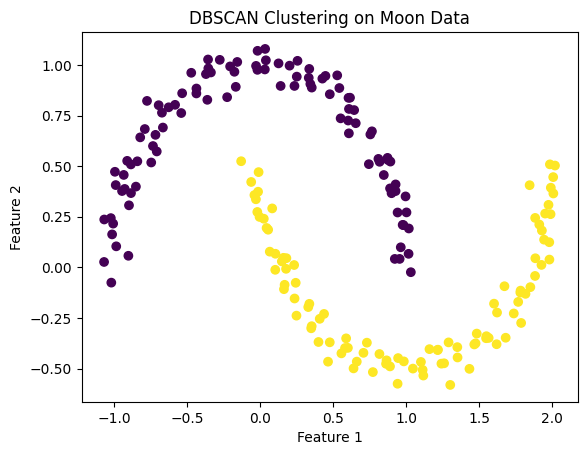

In [4]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 1. Generate sample non-linearly separable data
# make_moons creates a synthetic 2D dataset resembling two interlocked crescent shapes.
# X will store the (x, y) coordinates of the data points.
# The underscore '_' is used to ignore the true labels returned by make_moons,
# as DBSCAN is an unsupervised algorithm and doesn't use them for clustering.
# n_samples=200 generates 200 data points.
# noise=0.05 adds a small amount of random noise to the data for realism.
# random_state=0 ensures that the data generation is reproducible;
# you'll get the same dataset every time you run the code with this seed.
X, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2. Apply DBSCAN clustering
# Initialize the DBSCAN model:
# eps (epsilon): Defines the maximum distance between two samples for one to be considered
#                as in the neighborhood of the other. It's the radius of the neighborhood.
#                Here, a point's neighborhood extends 0.3 units.
# min_samples: The number of samples (or total weight) in a neighborhood for a point
#              to be considered a 'core point'. A core point has at least 'min_samples'
#              neighbors (including itself) within its 'eps' radius.
#              Here, a region is considered dense enough to form a cluster if it has at least 5 points.
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Fit the DBSCAN model to the data X and predict the cluster labels for each point.
# fit_predict() performs both the learning (fitting) and the assignment of clusters in one step.
# The 'clusters' array will contain an integer label for each data point indicating its cluster.
# Importantly, noise points (outliers) will be assigned a label of -1.
clusters = dbscan.fit_predict(X)

# 3. Plot the clustered data
# Create a 2D scatter plot using Matplotlib.
# plt.scatter(): This function draws individual data points as markers.
# X[:, 0]: Uses the first feature (x-coordinate) from the generated data 'X' as the x-axis values.
# X[:, 1]: Uses the second feature (y-coordinate) from the generated data 'X' as the y-axis values.
# c=clusters: Colors each data point based on its assigned cluster label.
#             Points in the same cluster will have the same color.
#             Noise points (cluster -1) will typically be colored distinctly.
# cmap='viridis': Specifies the colormap to use for assigning colors to clusters.
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title("DBSCAN Clustering on Moon Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# Display the plot.
plt.show()